# PCA, t-SNE

## 공통

In [24]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [25]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

matplotlib.rc("font", family="Malgun Gothic")
# matplotlib.rc("font", family="AppleGothic")
# matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams["axes.unicode_minus"] = False

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
plt.rcParams["image.cmap"] = "viridis"
plt.rcParams["image.interpolation"] = "none"
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["legend.numpoints"] = 1
plt.rc(
    "axes",
    prop_cycle=(
        cycler("color", mglearn.plot_helpers.cm_cycle.colors)
        + cycler("linestyle", ["-", "-", "--", (0, (3, 3)), (0, (1.5, 1.5))])
    ),
)

np.set_printoptions(precision=3, suppress=True)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

## PCA

In [26]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data = np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,...,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,...,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,...,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,...,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,...,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,...,1.04,2.93,735.0,0.0


In [27]:
print(f'데이터 집합에 누락된 값: {df.isna().sum().sum()}')
print(f'데이터 집합의 중복: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')
print(f'데이터 유형: {df.dtypes.unique()}')

데이터 집합에 누락된 값: 0
데이터 집합의 중복: 0, (0.0%)
데이터 유형: [dtype('float64')]


### 연습문제01. 전처리를 진행하세요.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) 
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,...,hue,od280/od315_of_diluted_wines,proline,target
0,1.52,-0.56,0.23,-1.17,...,0.36,1.85,1.01,-1.21
1,0.25,-0.50,-0.83,-2.49,...,0.41,1.11,0.97,-1.21
2,0.20,0.02,1.11,-0.27,...,0.32,0.79,1.40,-1.21
3,1.69,-0.35,0.49,-0.81,...,-0.43,1.18,2.33,-1.21
4,0.30,0.23,1.84,0.45,...,0.36,0.45,-0.04,-1.21


### 연습문제2. PCA를 적용하세요.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df.head()

,PC1,PC2
0,-3.52,1.45
1,-2.53,-0.33
2,-2.79,1.04
3,-3.92,2.77
4,-1.41,0.87


### 연습문제3. PCA의 결과를 시각적으로 표현하세요.

Text(0, 0.5, 'PC2')

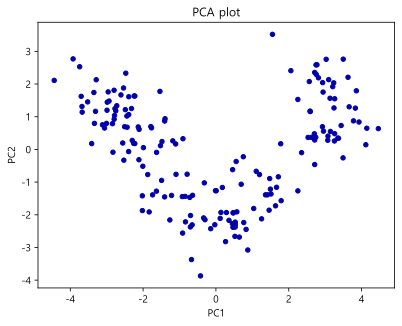

In [30]:
plt.Figure(figsize=(10,6))
plt.title("PCA plot")
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")


### 연습문제04. 적당한 그룹으로 나눠보세요.

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3 , max_iter=1000, random_state=42)
clusters = kmeans.fit_predict(X)
centroids= kmeans.cluster_centers_   #중앙값 들고 오기
centroids_pca = pca.transform(centroids)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

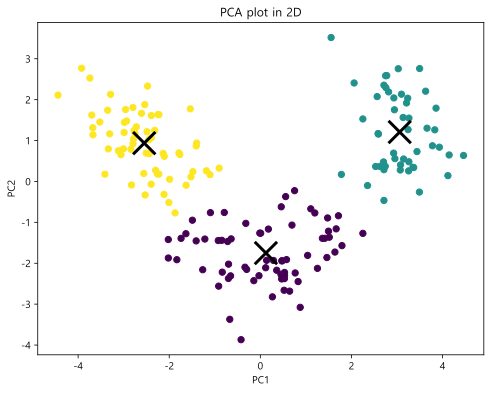

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=clusters, s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

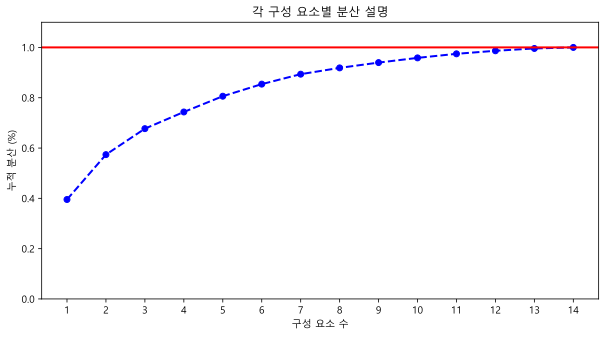

In [33]:
pca_var = PCA()
pca_var.fit(X)
plt.figure(figsize=(10, 5))
xi = np.arange(1, 1 + X.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker="o", linestyle="--", color="b")
plt.ylim(0.0, 1.1)
plt.xlabel("구성 요소 수")
plt.xticks(np.arange(1, 1 + X.shape[1], step=1))
plt.ylabel("누적 분산 (%)")
plt.title("각 구성 요소별 분산 설명")
plt.axhline(y=1, color="r", linestyle="-")
plt.gca().xaxis.grid(False)

In [34]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,-1.98,14.53
1,-2.36,10.97
2,-6.41,12.62
3,-4.84,15.15
4,-6.88,8.55


Text(0, 0.5, 'tsne component 2')

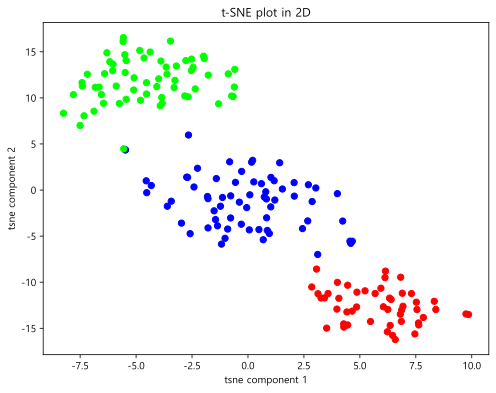

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')